In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/abraeley/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.9.0


<b>Import the Fashion MNIST dataset:</b>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#- importing the images along with their labels

In [18]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
#- These names are not included (labels are simply numbers)
#- Here those numbers are going to be mapped with an equivalent
#- element leading to the proper string

<b>Explore the data:</b>

In [19]:
train_images.shape
#- 60,000 images each being a 28x28 pixel image

(60000, 28, 28)

In [20]:
len(train_labels)
#- 60,000 labels

60000

In [21]:
train_labels
#- Each label is an integer between 0 and 9
#- Stands for each type, i.e. Trouser, Dress, etc.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
test_images.shape
#- 10,000 images in the test set, each a 28x28 pixel image

(10000, 28, 28)

In [23]:
len(test_labels)
#- 10,000 labels

10000

<b>Preprocess the data:</b>

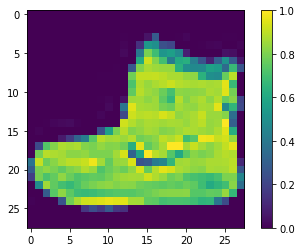

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
#- Showing that the pixel values fall in the range of 0 and 255

In [25]:
train_images = train_images/255.0

test_images = test_images/255.0
#- Normalizing data pixel values to between 0 and 1

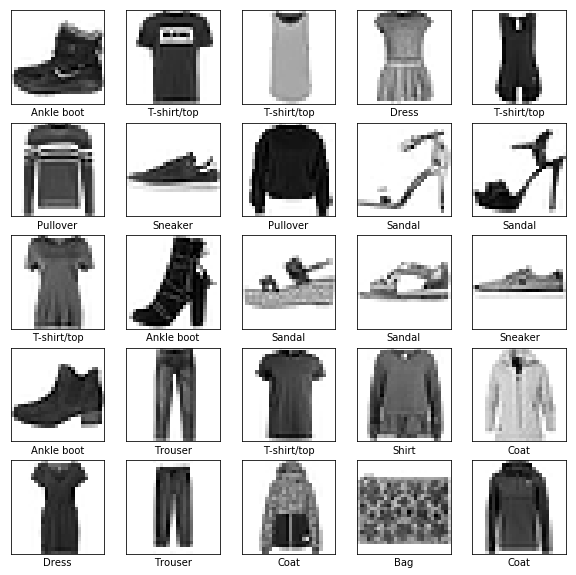

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
#- verifying that the data format is correct

<b>Build the model:</b>

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#- setting up the layers

#- Flatten transforms the format of images from a 2d-array(28x28 pixels), to a 1d-array (28*28=784 pixels)
#- This is simply a stacking/reformating of the data
#- Dense sets up two layers of "dense" neural networks
#- First Dense layer has 128 nodes (or neurons)
#- Second Dense layer has 10-nodes -> it's a softmax layer: returns an array of 10 probability scores
#- These scores sum to one. Each node contains a score that indicates the probability that the 
#- current image belongs to one of the 10 classes.

In [32]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

#- Compile the model

#- This sets up the model's "settings"
#- Optimizer -> How the model is updated based on the data it sees and its loss function
#- Loss function -> Measures how accurate the model is during training.
#- We want to minimize this function to "steer" the model in the right direction.
#- Metrics -> Monitors the training and testing steps. We will use accuracy, the fraction
#- of images that are correctly classified.

<b>Train the model:</b>

In [33]:
model.fit(train_images, train_labels, epochs=5)

#- Training the neural network requires the following steps:

#- 1) Feed training data to the model (i.e. train_images and train_labels)
#- 2) The model then learns to associate images and labels
#- 3) Then you can ask the model to make predictions about a test set
#- In this example we use test_images to make predictions and test_labels
#- to verify them.

#- The loss and accuracy metrics will be displayed.

Epoch 1/5
60000/60000 [==============================] - 7s 115us/step - loss: 1.0873 - acc: 0.6622
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.6388 - acc: 0.7703
Epoch 3/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.5608 - acc: 0.7998
Epoch 4/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.5178 - acc: 0.8175
Epoch 5/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.4903 - acc: 0.8279


<b>Evaluate accuracy:</b>

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc_percentage = test_acc*100
print('Test accuracy: '+str(test_acc_percentage)+"%")

#- Tests how well the model can recognize images

10000/10000 [==============================] - 1s 103us/step
Test accuracy: 81.76%


<b>Make predictions:</b>

In [43]:
predictions = model.predict(test_images)

predictions[0]

#- a prediction is an array of 10 numbers. These describe the "confidence" of the model that
#- the image corresponds to each of the 10 different articles of clothing.

array([3.3216165e-06, 5.4726236e-08, 1.1279949e-05, 6.0317707e-06,
       2.1998609e-05, 1.1384610e-01, 3.8726062e-05, 3.5396856e-01,
       8.2646972e-03, 5.2383929e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

#- Shows the label with the highest confidence value

9

A value of 9 shows that the model is most confident that this image is of an ankle boot, or class_names[9]

In [52]:
class_names[9]

'Ankle boot'

In [53]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

Now we can check against that with the test_labels:

In [54]:
class_names[test_labels[0]]

'Ankle boot'

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

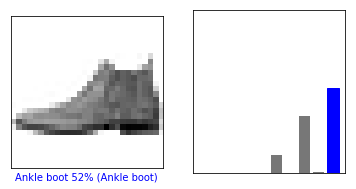

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

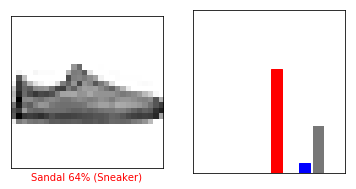

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

The correct prediction labels are blue and the incorrect ones are red. The number gives a percent for the predicted label (Note: It can be both very confident and wrong)

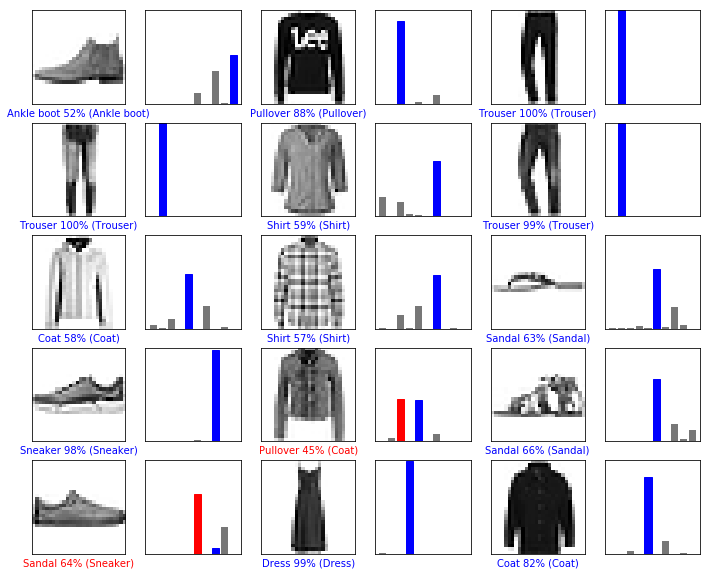

In [64]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
#- Plot the first X test images, their predicted label, and the true label
#- Color correct predictions in blue, incorrect predictions in red

Now lets predict for a single image. Keras is made to predict in batches so a single image will need to be inserted into its own batch:

In [66]:
img = test_images[0]

print(img.shape)
#- Grab an image from the test dataset

(28, 28)


In [67]:
img = (np.expand_dims(img,0))

print(img.shape)
#- Add the image to a batch where it's the only member.

(1, 28, 28)


In [68]:
predictions_single = model.predict(img)

print(predictions_single)
#- Predicting the image

[[3.3216172e-06 5.4726250e-08 1.1279952e-05 6.0317720e-06 2.1998614e-05
  1.1384612e-01 3.8726073e-05 3.5396832e-01 8.2646953e-03 5.2383941e-01]]


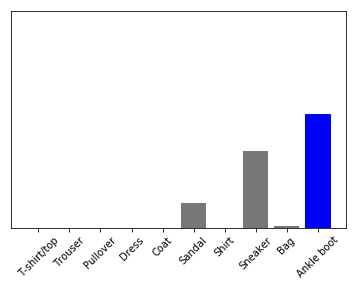

In [69]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# Copyright (c) 2017 François Chollet

Thanks to Google and Francois Chollet for the tutorial